# Clustering

### K-means clustering - example I

In [245]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [246]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [247]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.40, random_state=42)

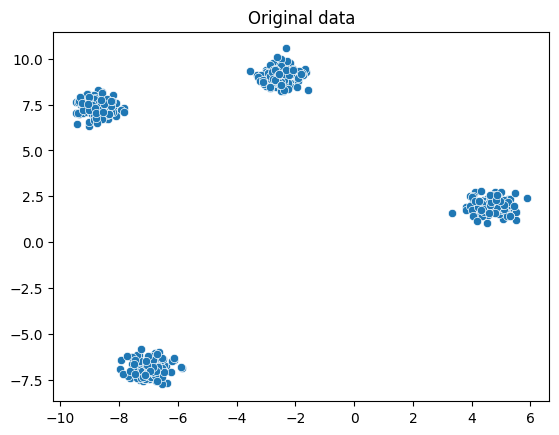

In [248]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title('Original data')
plt.show()

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [250]:
clf1 = KMeans(n_clusters=4, init='random')

clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

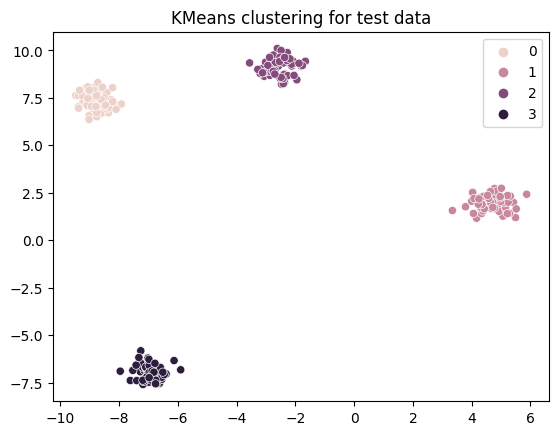

In [251]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred)
plt.title('KMeans clustering for test data')
plt.show()

In [252]:
clf1.inertia_

72.46237809788589

### K-means clustering - example II

In [253]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=1.4, random_state=42)

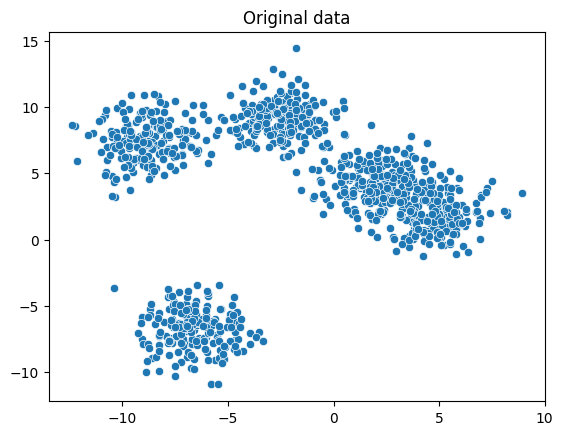

In [254]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.title('Original data')
plt.show()

### Comment: For data like above, algorithm will not work properly if we take 4 clusters

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [256]:
clf2 = KMeans(n_clusters=4, init='random', max_iter=2)

clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

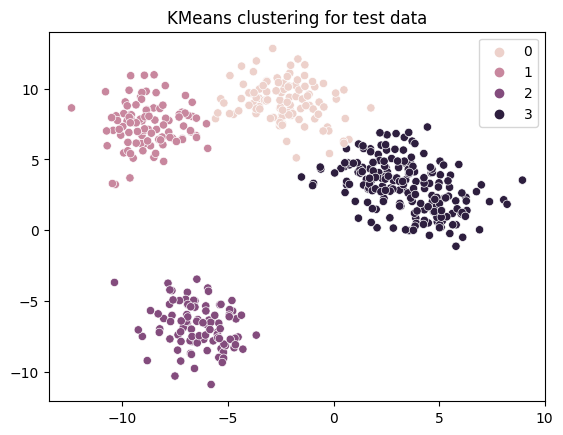

In [257]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred)
plt.title('KMeans clustering for test data')
plt.show()

In [258]:
clf2.inertia_

2447.902726985115

### K-means++ - example

In [259]:
clf3 = KMeans(n_clusters=4, init='k-means++', max_iter=2)

clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

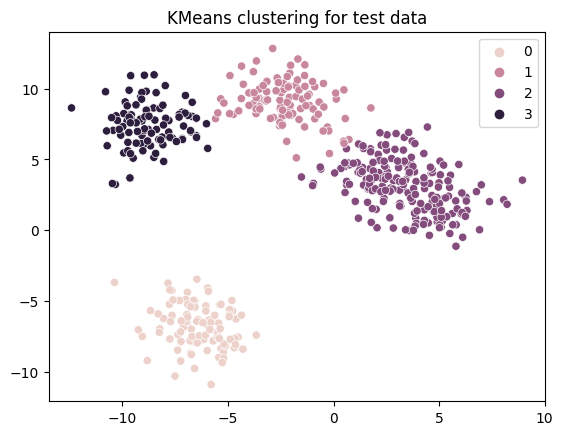

In [260]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred)
plt.title('KMeans clustering for test data')
plt.show()

In [261]:
clf3.inertia_

2444.7925841345395

### Elbow method

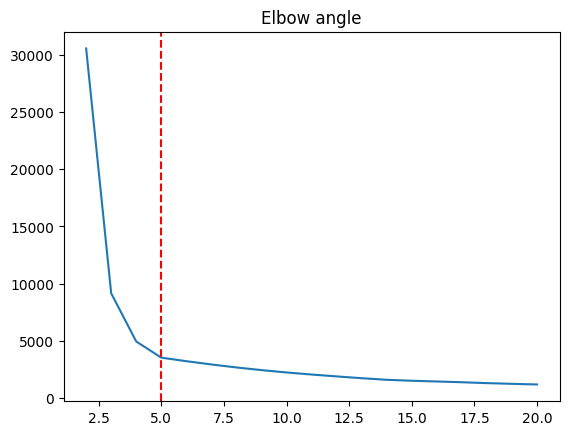

In [262]:
X_moon = pd.DataFrame(X, columns = ['f1','f2'])

# TODO: Kmeans
inertias = []
k_clusters = range(2, 21)

for k in k_clusters:
    clf = KMeans(n_clusters=k)
    clf.fit(X_moon, y)
    inertias.append(clf.inertia_)

CHOSEN_K = 5

# Plot
plt.plot(k_clusters, inertias)
plt.axvline(CHOSEN_K, c='r', linestyle='--')
plt.title('Elbow angle')
plt.show()

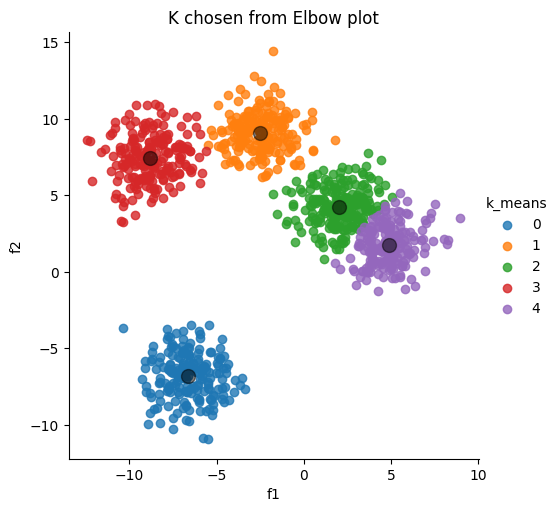

In [268]:
clf = KMeans(n_clusters=CHOSEN_K)
clf.fit(X_moon, y)
centers = clf.cluster_centers_

# Plot
X_moon['k_means'] = clf.predict(X_moon)
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue='k_means').set(title='K chosen from Elbow plot')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

### Hierarchical methods